Given below is a 5x5 region of a noisy image with it pixel values:

a) Carefully observe the pixel values in the provided 5x5 image region. What type of noise do you observe in
the image?
observed noise in the image is salt and pepper noise / impulse noise.
random occurrences of white(255) and black(0) pixels in the image region.
b)Which filtering technique is most effective in removing this type of noise?
order-statistic filter (3x3) to remove the noise, we will use a median filter.
c)Apply the filter you named in part b and provide the new 5x5 image region with the noise reduced. What
improvements can you observe after filtering?
| | | | | |
|---|---|---|---|---|
| 0 | 255 | 123 | 120 | 255 |
| 255 | 0 | 130 | 110 | 0 |
| 121 | 255 | 118 | 255 | 128 |
| 255 | 122 | 0 | 255 | 128 |
| 120 | 110 | 255 | 0 | 124 |
| | | | | |


In [28]:
import numpy as np
from scipy.signal import medfilt2d

# Define the 5x5 image region as a NumPy array
image = np.array([
    [0, 255, 123, 120, 255],
    [255, 0, 130, 110, 0],
    [121, 255, 118, 255, 128],
    [255, 122, 0, 255, 128],
    [120, 110, 255, 0, 124]
])

# Apply a 3x3 median filter to the image
filtered_image = medfilt2d(image, kernel_size=3)

# Print the filtered image
print("Filtered Image:")
print(filtered_image)

Filtered Image:
[[  0   0 110 110   0]
 [  0 123 123 123 110]
 [121 122 122 128 110]
 [120 121 122 128 124]
 [  0 110   0   0   0]]


In [35]:
import numpy as np

# Define the 5x5 image region as a NumPy array
image = np.array([
    [0, 255, 123, 120, 255],
    [255, 0, 130, 110, 0],
    [121, 255, 118, 255, 128],
    [255, 122, 0, 255, 128],
    [120, 110, 255, 0, 124]
])

# Function to apply a 3x3 median filter manually
def apply_median_filter(image):
    padded_image = np.pad(image, 1, mode='constant', constant_values=0)
    filtered_image = image.copy()
    
    for i in range(1, padded_image.shape[0] - 1):
        for j in range(1, padded_image.shape[1] - 1):
            # Extract the 3x3 neighborhood
            neighborhood = padded_image[i-1:i+2, j-1:j+2]
            # Compute the median of the neighborhood
            median_value = np.median(neighborhood)
            # Assign the median value to the corresponding pixel in the filtered image
            filtered_image[i-1, j-1] = median_value
            # Print the median value
            print('neighborhood\n',neighborhood)
            print(f"Median for pixel ({i-1}, {j-1}): {median_value}, ({np.sort(neighborhood.flatten())})")
            print(filtered_image)
            print()
    
    return filtered_image

# Apply the median filter to the image
filtered_image = apply_median_filter(image)

# Print the filtered image
print("Filtered Image:")
print(filtered_image)

neighborhood
 [[  0   0   0]
 [  0   0 255]
 [  0 255   0]]
Median for pixel (0, 0): 0.0, ([  0   0   0   0   0   0   0 255 255])
[[  0 255 123 120 255]
 [255   0 130 110   0]
 [121 255 118 255 128]
 [255 122   0 255 128]
 [120 110 255   0 124]]

neighborhood
 [[  0   0   0]
 [  0 255 123]
 [255   0 130]]
Median for pixel (0, 1): 0.0, ([  0   0   0   0   0 123 130 255 255])
[[  0   0 123 120 255]
 [255   0 130 110   0]
 [121 255 118 255 128]
 [255 122   0 255 128]
 [120 110 255   0 124]]

neighborhood
 [[  0   0   0]
 [255 123 120]
 [  0 130 110]]
Median for pixel (0, 2): 110.0, ([  0   0   0   0 110 120 123 130 255])
[[  0   0 110 120 255]
 [255   0 130 110   0]
 [121 255 118 255 128]
 [255 122   0 255 128]
 [120 110 255   0 124]]

neighborhood
 [[  0   0   0]
 [123 120 255]
 [130 110   0]]
Median for pixel (0, 3): 110.0, ([  0   0   0   0 110 120 123 130 255])
[[  0   0 110 110 255]
 [255   0 130 110   0]
 [121 255 118 255 128]
 [255 122   0 255 128]
 [120 110 255   0 124]]

neighbor

|     |     |     |     |     |     |
| --- | --- | --- | --- | --- | --- | --- |
| 1   | 2   | 1   | 3   | 4   | 1   | 0   |
| 2   | 5   | 6   | 4   | 2   | 5   | 1   |
| 3   | 6   | 2   | 5   | 2   | 0   | 1   |
| 4   | 1   | 3   | 6   | 0   | 3   | 5   |
| 2   | 6   | 5   | 4   | 2   | 6   | 4   |
| 5   | 6   | 3   | 1   | 0   | 5   | 2   |
| 1   | 2   | 5   | 4   | 2   | 6   | 0   |
|     |     |     |     |     |     |     |

Given the following 7x7 grayscale image, perform histogram equalization to enhance the image's contrast.

a)Construct the histogram of the pixel intensities (gray levels).

b)Calculate the probability of each gray level occurring in the image.

c)Compute the cumulative distribution function (CDF).

d)Normalize the CDF to map the original pixel values to new intensity levels (in the range 0-7 for 3 bits).

e)Create the histogram equalized image based on the new intensity levels.


[0 1 2 3 4 5 6]


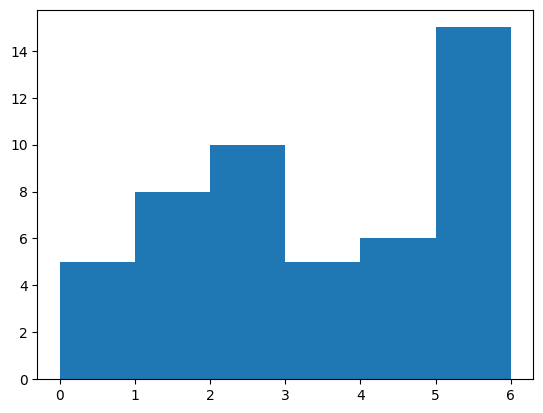

[ 5  8 10  5  6  8  7]


In [43]:
image = np.array([    
    [1,2,1,3,4,1,0],
    [2,5,6,4,2,5,1],
    [3,6,2,5,2,0,1],
    [4,1,3,6,0,3,5],
    [2,6,5,4,2,6,4],
    [5,6,3,1,0,5,2],
    [1,2,5,4,2,6,0],
])

#### histogram of graylevels (pixel intensities)
import matplotlib.pyplot as plt
# get distinct entries in the image and display counts of each
print(np.unique(image))
plt.hist(image.ravel(), 6, [0,6])
plt.show()

# print frequencies of each graylevel
print(np.bincount(image.ravel()))

In [44]:
# print probs of each graylevel
freq = np.bincount(image.ravel())
total_pixels = np.sum(freq)
print(freq,total_pixels)
print(freq/total_pixels)

[ 5  8 10  5  6  8  7] 49
[0.10204082 0.16326531 0.20408163 0.10204082 0.12244898 0.16326531
 0.14285714]


In [45]:
# calulate cdf
cdf = np.cumsum(freq/total_pixels)
print(cdf)

[0.10204082 0.26530612 0.46938776 0.57142857 0.69387755 0.85714286
 1.        ]


In [57]:
# max graylevel
number = int(np.max(image))

bit_length = number.bit_length()

print(f"Number: {number}")
print(f"Number of bytes needed: {bit_length}")
L = 2**bit_length
s_k = cdf* (L-1)
s_k

Number: 6
Number of bytes needed: 3


array([0.71428571, 1.85714286, 3.28571429, 4.        , 4.85714286,
       6.        , 7.        ])

In [59]:
hist_equalized = np.uint8(s_k[image])
hist_equalized

array([[1, 3, 1, 4, 4, 1, 0],
       [3, 6, 7, 4, 3, 6, 1],
       [4, 7, 3, 6, 3, 0, 1],
       [4, 1, 4, 7, 0, 4, 6],
       [3, 7, 6, 4, 3, 7, 4],
       [6, 7, 4, 1, 0, 6, 3],
       [1, 3, 6, 4, 3, 7, 0]], dtype=uint8)

[1 2 3 5]


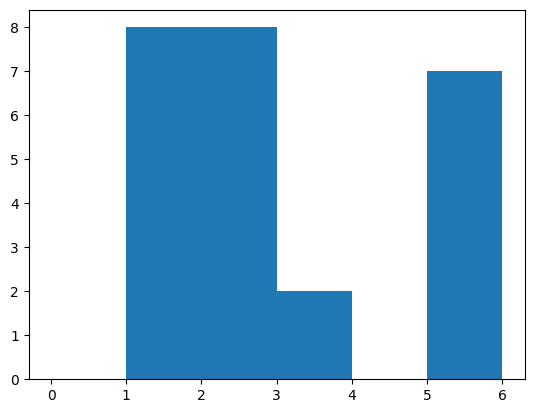

[0 8 8 2 0 7]
[0 8 8 2 0 7] 25
[0.   0.32 0.32 0.08 0.   0.28]
[0.   0.32 0.64 0.72 0.72 1.  ]
Number: 5
Number of bytes needed: 3
[0.   2.24 4.48 5.04 5.04 7.  ]


array([[2, 4, 2, 2, 2],
       [4, 7, 5, 7, 4],
       [4, 7, 7, 7, 4],
       [4, 7, 5, 7, 4],
       [2, 2, 2, 4, 2]], dtype=uint8)

In [60]:
# testing on another image
image = np.array(
    [
[1,2,1,1,1],
[2,5,3,5,2],
[2,5,5,5,2],
[2,5,3,5,2],
[1,1,1,2,1]
    ]
)

#### histogram of graylevels (pixel intensities)
import matplotlib.pyplot as plt
# get distinct entries in the image and display counts of each
print(np.unique(image))
plt.hist(image.ravel(), 6, [0,6])
plt.show()

# print frequencies of each graylevel
print(np.bincount(image.ravel()))

# print probs of each graylevel
freq = np.bincount(image.ravel())
total_pixels = np.sum(freq)
print(freq,total_pixels)
print(freq/total_pixels)

# calulate cdf
cdf = np.cumsum(freq/total_pixels)
print(cdf)

# max graylevel
number = int(np.max(image))

bit_length = number.bit_length()

print(f"Number: {number}")
print(f"Number of bytes needed: {bit_length}")
L = 2**bit_length
s_k = cdf* (L-1)
print(s_k)

hist_equalized = np.uint8(s_k[image])
hist_equalized

Consider the following 6x6 grayscale image and a 3x3 convolutional kernel.
Image:

```
[1 2 3 0 1 2
4 5 6 1 0 1
7 8 9 2 1 0
0 1 2 3 4 5
1 2 3 4 5 6
6 7 8 9 0 1]
```

Kernel:

```
[1 0 -1
1 0 -1
1 0 -1 ]
```

Perform a convolution operation on the image with replicate padding to get the resultant image.


In [31]:
import numpy as np
import cv2
image = np.array([
    [1, 2, 3, 0, 1, 2],
    [4, 5, 6, 1, 0, 1],
    [7, 8, 9, 2, 1, 0],
    [0, 1, 2, 3, 4, 5],
    [1, 2, 3, 4, 5, 6],
    [6, 7, 8, 9, 0, 1]
])

# 3x3 convolutional kernel
kernel = np.array([
    [ 1,  0, -1],
    [ 1,  0, -1],
    [ 1,  0, -1]
])

replicate_padding = np.pad(image, 1, mode='edge')
kernel = np.rot90(kernel, 2)
replicate_padding, replicate_padding.shape, image.shape, kernel

(array([[1, 1, 2, 3, 0, 1, 2, 2],
        [1, 1, 2, 3, 0, 1, 2, 2],
        [4, 4, 5, 6, 1, 0, 1, 1],
        [7, 7, 8, 9, 2, 1, 0, 0],
        [0, 0, 1, 2, 3, 4, 5, 5],
        [1, 1, 2, 3, 4, 5, 6, 6],
        [6, 6, 7, 8, 9, 0, 1, 1],
        [6, 6, 7, 8, 9, 0, 1, 1]]),
 (8, 8),
 (6, 6),
 array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]))

In [32]:
# apply convolution
convolution = np.zeros_like(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        # 3x3 region for kernel
        neighborhood = replicate_padding[i:i+kernel.shape[0], j:j+kernel.shape[1]]
        print(neighborhood)
        # element-wise multiplication
        convolution[i, j] = np.sum(neighborhood * kernel)
        print((neighborhood * kernel).flatten(), convolution[i, j])
        print()
        
print(convolution)

[[1 1 2]
 [1 1 2]
 [4 4 5]]
[-1  0  2 -1  0  2 -4  0  5] 3

[[1 2 3]
 [1 2 3]
 [4 5 6]]
[-1  0  3 -1  0  3 -4  0  6] 6

[[2 3 0]
 [2 3 0]
 [5 6 1]]
[-2  0  0 -2  0  0 -5  0  1] -8

[[3 0 1]
 [3 0 1]
 [6 1 0]]
[-3  0  1 -3  0  1 -6  0  0] -10

[[0 1 2]
 [0 1 2]
 [1 0 1]]
[ 0  0  2  0  0  2 -1  0  1] 4

[[1 2 2]
 [1 2 2]
 [0 1 1]]
[-1  0  2 -1  0  2  0  0  1] 3

[[1 1 2]
 [4 4 5]
 [7 7 8]]
[-1  0  2 -4  0  5 -7  0  8] 3

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[-1  0  3 -4  0  6 -7  0  9] 6

[[2 3 0]
 [5 6 1]
 [8 9 2]]
[-2  0  0 -5  0  1 -8  0  2] -12

[[3 0 1]
 [6 1 0]
 [9 2 1]]
[-3  0  1 -6  0  0 -9  0  1] -16

[[0 1 2]
 [1 0 1]
 [2 1 0]]
[ 0  0  2 -1  0  1 -2  0  0] 0

[[1 2 2]
 [0 1 1]
 [1 0 0]]
[-1  0  2  0  0  1 -1  0  0] 1

[[4 4 5]
 [7 7 8]
 [0 0 1]]
[-4  0  5 -7  0  8  0  0  1] 3

[[4 5 6]
 [7 8 9]
 [0 1 2]]
[-4  0  6 -7  0  9  0  0  2] 6

[[5 6 1]
 [8 9 2]
 [1 2 3]]
[-5  0  1 -8  0  2 -1  0  3] -8

[[6 1 0]
 [9 2 1]
 [2 3 4]]
[-6  0  0 -9  0  1 -2  0  4] -12

[[1 0 1]
 [2 1 0]
 [3 4 5]]
[-

Image Region I(u,v):
| | | |
|---|---|---|
|4 |3| 7|
|2 |9 |1|
|6| 5 |0|
| | | |

Weight Matrix W(i,j):

|     |     |     |
| --- | --- | --- |
| 1   | 1   | 2   |
| 2   | 3   | 2   |
| 1   | 2   | 1   |
|     |     |     |

a)Calculate the weighted median value for the pixel region using the provided weight matrix. Show all steps,
including the extended pixel vector and its sorted form.

b)Explain the advantage of using a weighted median filter over a traditional median filter in terms of noise
reduction and edge preservation.


In [2]:
import numpy as np
#### from question 
# I_(i,v)
image_region = np.array([
    [4,3,7],
    [2,9,1],
    [6,5,0]
])

# W_(i,j)
weight_matrix = np.array([
    [1,1,2],
    [2,3,2],
    [1,2,1]
])

# # from example we had weighted median = 2
# image_region= np.array([
#     [3,7,2],
#     [1,0,0],
#     [9,5,8]
# ])

# weight_matrix = np.array([
#     [1,2,1],
#     [2,3,2],
#     [1,2,1]
# ])

# Extended pixel vector
extended_vector = []

for i in range(3):
    for j in range(3):
        pixel_value = image_region[i, j]
        weight = weight_matrix[i, j]
        extended_vector.extend([pixel_value] * weight)

print("Extended vector:")
print(extended_vector)

# Sort the extended vector
sorted_vector = sorted(extended_vector)

print("\nSorted extended vector:")
print(sorted_vector)

# Calculate the median
median_index = len(sorted_vector) // 2
weighted_median = sorted_vector[median_index]

print(f"\nWeighted median value: {weighted_median}")

Extended vector:
[4, 3, 7, 7, 2, 2, 9, 9, 9, 1, 1, 6, 5, 5, 0]

Sorted extended vector:
[0, 1, 1, 2, 2, 3, 4, 5, 5, 6, 7, 7, 9, 9, 9]

Weighted median value: 5


Advantages of weighted median filter over traditional median filter:

Edge Preservation: The weighted median filter can better preserve edges and fine details in the image. By assigning higher weights to certain pixels (often the center pixel and its closest neighbors), it can maintain important structural information while still reducing noise.
Adaptability: The weights can be adjusted based on local image characteristics, making the filter more adaptable to different types of images and noise patterns.
Control over smoothing: By adjusting the weights, you can control the degree of smoothing. This allows for a more fine-tuned approach to noise reduction compared to the traditional median filter.
Preservation of thin lines and corners: In cases where thin lines or corners are important features of the image, a weighted median filter can be designed to preserve these better than a standard median filter.
Reduced blurring: While still effective at removing impulse noise like salt and pepper noise, a weighted median filter typically introduces less blurring than a traditional median filter, especially when properly tuned.
Better performance in areas of high detail: In areas of the image with high detail or texture, a weighted median filter can be more effective at preserving this detail while still reducing noise.

The Sobel operator is a widely used method for edge detection in image processing. It computes the gradient
of the image intensity in both horizontal and vertical directions using convolution with two 3x3 kernels.
Image Region I(u,v):
|   |   |   |
|---|---|---|
|120| 125 |130|
|118 |124 |128|
|110 |115| 120|
|   |   |   |

The Sobel operator is defined by the following kernels:
```
Gx=[-1 0 1
-2 0 2
-1 0 1]
```
```
Gy=[-1 -2 -1
0 0 0
1 2 1]
```
a)Compute the horizontal gradient Gx for all pixels in the image region. Show the full convolution process for
each pixel.

b)Compute the vertical gradient Gy for all pixels in the image region. Show the full convolution process for
each pixel.

c)Calculate the gradient magnitude M for each pixel in the image. Show the detailed steps.

In [12]:
# Padding the image region with zeros
padded_image = np.pad(np.array([[120, 125, 130],
                                [118, 124, 128],
                                [110, 115, 120]]), pad_width=1, mode='constant')
print("Padded image:\n", padded_image)
# Calculating Gx for each pixel
Gx_results = np.zeros((3, 3))

for i in range(1, 4):
    for j in range(1, 4):
        # Extracting 3x3 neighborhood
        neighborhood = padded_image[i-1:i+2, j-1:j+2]
        # Applying Gx kernel
        # gx = (z7 + 2*z8 + z9) - (z1 + 2*z2 + z3)
        Gx = (neighborhood[0, 2] + 2*neighborhood[1, 2] + neighborhood[2, 2]) - \
             (neighborhood[0, 0] + 2*neighborhood[1, 0] + neighborhood[2, 0])
        
        Gx_results[i-1, j-1] = Gx
        print(neighborhood, '\nGx for pixel (', i-1, j-1, '):', Gx, 'result = ', Gx_results,'\n')
print()
print("Horizontal Gradient (Gx) results:")
print(Gx_results)

Padded image:
 [[  0   0   0   0   0]
 [  0 120 125 130   0]
 [  0 118 124 128   0]
 [  0 110 115 120   0]
 [  0   0   0   0   0]]
[[  0   0   0]
 [  0 120 125]
 [  0 118 124]] 
Gx for pixel ( 0 0 ): 374 result =  [[374.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]] 

[[  0   0   0]
 [120 125 130]
 [118 124 128]] 
Gx for pixel ( 0 1 ): 30 result =  [[374.  30.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]] 

[[  0   0   0]
 [125 130   0]
 [124 128   0]] 
Gx for pixel ( 0 2 ): -374 result =  [[ 374.   30. -374.]
 [   0.    0.    0.]
 [   0.    0.    0.]] 

[[  0 120 125]
 [  0 118 124]
 [  0 110 115]] 
Gx for pixel ( 1 0 ): 488 result =  [[ 374.   30. -374.]
 [ 488.    0.    0.]
 [   0.    0.    0.]] 

[[120 125 130]
 [118 124 128]
 [110 115 120]] 
Gx for pixel ( 1 1 ): 40 result =  [[ 374.   30. -374.]
 [ 488.   40.    0.]
 [   0.    0.    0.]] 

[[125 130   0]
 [124 128   0]
 [115 120   0]] 
Gx for pixel ( 1 2 ): -488 result =  [[ 374.   30. -374.]
 [ 488.   40. -488.]
 [   0.    0.    

In [13]:
# Padding the image region with zeros (same as before)
padded_image = np.pad(np.array([[120, 125, 130],
                                [118, 124, 128],
                                [110, 115, 120]]), pad_width=1, mode='constant')

# Calculating Gy for each pixel
Gy_results = np.zeros((3, 3))

for i in range(1, 4):
    for j in range(1, 4):
        # Extracting 3x3 neighborhood
        neighborhood = padded_image[i-1:i+2, j-1:j+2]
        # Applying Gy kernel
        # gy = (z3 + 2*z6 + z9) - (z1 + 2*z4 + z7)
        Gy = (neighborhood[2, 0] + 2*neighborhood[2, 1] + neighborhood[2, 2]) - \
             (neighborhood[0, 0] + 2*neighborhood[0, 1] + neighborhood[0, 2])
        
        Gy_results[i-1, j-1] = Gy
        print(neighborhood, '\nGy for pixel (', i-1, j-1, '):', Gy, 'result = ', Gy_results,'\n')

print()
print("Vertical Gradient (Gy) results:")
print(Gy_results)

[[  0   0   0]
 [  0 120 125]
 [  0 118 124]] 
Gy for pixel ( 0 0 ): 360 result =  [[360.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]] 

[[  0   0   0]
 [120 125 130]
 [118 124 128]] 
Gy for pixel ( 0 1 ): 494 result =  [[360. 494.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]] 

[[  0   0   0]
 [125 130   0]
 [124 128   0]] 
Gy for pixel ( 0 2 ): 380 result =  [[360. 494. 380.]
 [  0.   0.   0.]
 [  0.   0.   0.]] 

[[  0 120 125]
 [  0 118 124]
 [  0 110 115]] 
Gy for pixel ( 1 0 ): -30 result =  [[360. 494. 380.]
 [-30.   0.   0.]
 [  0.   0.   0.]] 

[[120 125 130]
 [118 124 128]
 [110 115 120]] 
Gy for pixel ( 1 1 ): -40 result =  [[360. 494. 380.]
 [-30. -40.   0.]
 [  0.   0.   0.]] 

[[125 130   0]
 [124 128   0]
 [115 120   0]] 
Gy for pixel ( 1 2 ): -30 result =  [[360. 494. 380.]
 [-30. -40. -30.]
 [  0.   0.   0.]] 

[[  0 118 124]
 [  0 110 115]
 [  0   0   0]] 
Gy for pixel ( 2 0 ): -360 result =  [[ 360.  494.  380.]
 [ -30.  -40.  -30.]
 [-360.    0.    0.]] 

[[118 124 

In [14]:
import numpy as np

# Calculating gradient magnitude
# M(x, y) = sqrt(Gx^2 + Gy^2)
M_results = np.sqrt(Gx_results**2 + Gy_results**2)
print(Gx_results**2)
print(Gy_results**2)
print()
print(Gx_results**2 + Gy_results**2)    
print("Gradient Magnitude (M) results:")
print(M_results)

[[139876.    900. 139876.]
 [238144.   1600. 238144.]
 [125316.    900. 125316.]]
[[129600. 244036. 144400.]
 [   900.   1600.    900.]
 [129600. 244036. 144400.]]

[[269476. 244936. 284276.]
 [239044.   3200. 239044.]
 [254916. 244936. 269716.]]
Gradient Magnitude (M) results:
[[519.11077816 494.91009285 533.17539328]
 [488.92126155  56.56854249 488.92126155]
 [504.89206767 494.91009285 519.34189124]]


In [9]:
import cv2
import numpy as np

# Define the image region
img = np.array([[120, 125, 130],
                [118, 124, 128],
                [110, 115, 120]], dtype=np.float32)

# OpenCV Sobel
gx_cv = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
gy_cv = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
mag_cv = cv2.magnitude(gx_cv, gy_cv)

# Custom implementation to match OpenCV
def custom_sobel(img):
    # Pad the image
    padded = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
    
    gx = np.zeros_like(img)
    gy = np.zeros_like(img)
    
    # Sobel kernels
    kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    
    # Apply convolution
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            gx[i, j] = np.sum(padded[i:i+3, j:j+3] * kx)
            gy[i, j] = np.sum(padded[i:i+3, j:j+3] * ky)
    
    mag = np.sqrt(gx**2 + gy**2)
    return gx, gy, mag

gx_custom, gy_custom, mag_custom = custom_sobel(img)

print("OpenCV Gx:")
print(gx_cv)
print("\nCustom Gx:")
print(gx_custom)
print("\nOpenCV Gy:")
print(gy_cv)
print("\nCustom Gy:")
print(gy_custom)
print("\nOpenCV Magnitude:")
print(mag_cv)
print("\nCustom Magnitude:")
print(mag_custom)

OpenCV Gx:
[[ 0. 40.  0.]
 [ 0. 40.  0.]
 [ 0. 40.  0.]]

Custom Gx:
[[21. 40. 19.]
 [22. 40. 18.]
 [21. 40. 19.]]

OpenCV Gy:
[[  0.   0.   0.]
 [-40. -40. -40.]
 [  0.   0.   0.]]

Custom Gy:
[[ -7.  -6.  -7.]
 [-40. -40. -40.]
 [-33. -34. -33.]]

OpenCV Magnitude:
[[ 0.       40.        0.      ]
 [40.       56.568542 40.      ]
 [ 0.       40.        0.      ]]

Custom Magnitude:
[[22.135944 40.4475   20.248457]
 [45.65085  56.568542 43.863426]
 [39.115215 52.49762  38.078865]]


In [15]:
import numpy as np

# Image region (3x3)
image_region = np.array([
    [120, 125, 130],
    [118, 124, 128],
    [110, 115, 120]
])

# Sobel Kernels
Gx_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Padding the image region with zeros
padded_image = np.pad(image_region, pad_width=1, mode='constant')
print("Padded image:\n", padded_image)

# Calculate Gx and Gy for each pixel
Gx_results = np.zeros((3, 3))
Gy_results = np.zeros((3, 3))
Magnitude = np.zeros(1)

for i in range(1, 4):
    for j in range(1, 4):
        # Extracting 3x3 neighborhood
        neighborhood = padded_image[i-1:i+2, j-1:j+2]

        # Applying Gx kernel
        Gx = (neighborhood[0, 2] + 2 * neighborhood[1, 2] + neighborhood[2, 2]) - \
             (neighborhood[0, 0] + 2 * neighborhood[1, 0] + neighborhood[2, 0])
        Gx_results[i-1, j-1] = Gx

        # Applying Gy kernel
        Gy = (neighborhood[2, 0] + 2 * neighborhood[2, 1] + neighborhood[2, 2]) - \
             (neighborhood[0, 0] + 2 * neighborhood[0, 1] + neighborhood[0, 2])
        Gy_results[i-1, j-1] = Gy
        

print("Horizontal Gradient (Gx) results:\n", Gx_results)
print("Vertical Gradient (Gy) results:\n", Gy_results)

# Calculate Gradient Magnitude (M)
M_results = np.sqrt(Gx_results**2 + Gy_results**2)
print("Gradient Magnitude (M) results:\n", M_results)

Gx = (Gx_results[0, 2] + 2 * Gx_results[1, 2] + Gx_results[2, 2]) - \
    (Gx_results[0, 0] + 2 * Gx_results[1, 0] + Gx_results[2, 0])
    
Gy = (Gy_results[2, 0] + 2 * Gy_results[2, 1] + Gy_results[2, 2]) - \
    (Gy_results[0, 0] + 2 * Gy_results[0, 1] + Gy_results[0, 2])
    
Gx2 = Gx**2
Gy2 = Gy**2

sGx = (Gx2 + Gy2)
Magnitude = np.sqrt(sGx)

print("Magnitude results:\n", Magnitude)        

Padded image:
 [[  0   0   0   0   0]
 [  0 120 125 130   0]
 [  0 118 124 128   0]
 [  0 110 115 120   0]
 [  0   0   0   0   0]]
Horizontal Gradient (Gx) results:
 [[ 374.   30. -374.]
 [ 488.   40. -488.]
 [ 354.   30. -354.]]
Vertical Gradient (Gy) results:
 [[ 360.  494.  380.]
 [ -30.  -40.  -30.]
 [-360. -494. -380.]]
Gradient Magnitude (M) results:
 [[519.11077816 494.91009285 533.17539328]
 [488.92126155  56.56854249 488.92126155]
 [504.89206767 494.91009285 519.34189124]]
Magnitude results:
 4853.699619877604
